### Техническое задание

In [1]:
# Загрузим данные и взглянем на них
import pandas as pd

data = pd.read_excel('data.xlsx')
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [2]:
# Удалим колонку с пропущенными значениями
data = data.drop(columns=['Unnamed: 5'])
data.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
document           21
receiving_date    123
dtype: int64

In [3]:
# Посмотрим на размер таблицы
data.shape

(730, 7)

In [4]:
# На типы колонок
data.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
document           object
receiving_date     object
dtype: object

In [5]:
# Переведем receiving_date в тип datetime
data['receiving_date'] = pd.to_datetime(data.receiving_date, format='%Y-%m-%d %H:%M:%S', errors='coerce')
data.dtypes

client_id                float64
sum                      float64
status                    object
sale                      object
new/current               object
document                  object
receiving_date    datetime64[ns]
dtype: object

In [6]:
# Создадим колонку с месяцем сделок. Для начала посмотрим на значения колонки статус
data.status.value_counts()

status
ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: count, dtype: int64

In [7]:
# Итак, нам нужны строки с месяцами 2021 года
data.query('status not in ["ОПЛАЧЕНО","ПРОСРОЧЕНО","В РАБОТЕ","НА ПОДПИСАНИИ","ВНУТРЕННИЙ"]')

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaT
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaT
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaT
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaT
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaT


In [8]:
# Создадим колонку
for i in range(730):
    if i <= 128:
        data.loc[i, "transaction_date"] = 'Май 2021'
    elif (i > 128) and (i <= 257):
        data.loc[i, "transaction_date"] = 'Июнь 2021'
    elif (i > 257) and (i <= 368):
        data.loc[i, "transaction_date"] = 'Июль 2021'
    elif (i > 368) and (i <= 483):
        data.loc[i, "transaction_date"] = 'Август 2021'
    elif (i > 483) and (i <= 593):
        data.loc[i, "transaction_date"] = 'Сентябрь 2021'
    elif (i > 593) and (i <= 729):
        data.loc[i, "transaction_date"] = 'Октябрь 2021'
    else:
        data.loc[i, "transaction_date"] = None

In [9]:
# Дропнем строки, где sum значения Na
data = data[data['sum'].notna()]

In [10]:
# Проверим таблицу
data.head()

,client_id,sum,status,sale,new/current,document,receiving_date,transaction_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май 2021


In [11]:
data.shape

(724, 8)

In [12]:
# Отлично, посмотрим на вопросы

---

### Вопросы
*1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.*

In [13]:
# Отберем данные по году и месяцу, просуммируем выручку с условием того, что приход не просрочен
data[(data['transaction_date'] == 'Июль 2021')].query('status != "ПРОСРОЧЕНО"')['sum'].sum()

859896.4699999997

In [14]:
# Занесем результат в переменную и округлим до двух чисел после запятой
revenue_by_july_2021 = round(data[(data['transaction_date'] == 'Июль 2021')].query('status != "ПРОСРОЧЕНО"')['sum'].sum(), 2)
revenue_by_july_2021

859896.47

*2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.*

<Axes: xlabel='transaction_date', ylabel='sum'>

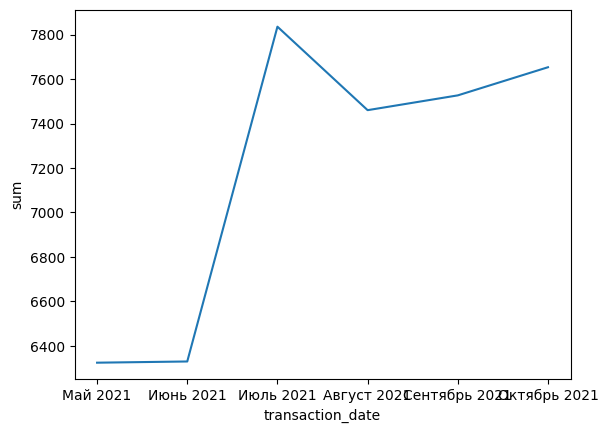

In [15]:
# Импортируем библиотеку для визуализации и построим первоначальный график
import seaborn as sns
import matplotlib.pyplot as plt 

sns.lineplot(data=data, x='transaction_date', y='sum', errorbar=None)

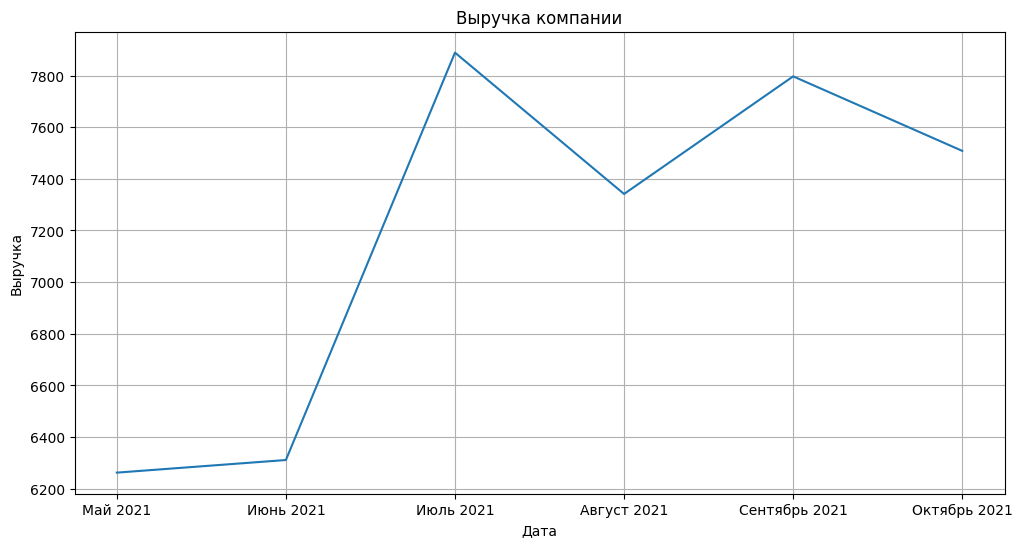

In [16]:
# Модернизируем график и приведем более валидные данные
valid_data_for_plot = data[(data['status'] == 'ОПЛАЧЕНО') & 
                           (data['sum'].notnull()) &
                           (data['transaction_date'].notnull())]

plt.figure(figsize=(12, 6))
sns.lineplot(data=valid_data_for_plot, x='transaction_date', y='sum', errorbar=None)
plt.title('Выручка компании')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

*3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?*

In [17]:
# Сгруппируем данные по менеджерам, посчитав их выручку за сентябрь 2021 (будем считать только прошедшие оплату сделки)
most_profit_manager_september_2021 = data[(data['transaction_date']  == 'Сентябрь 2021') &
                                          ((data['status'] == 'ОПЛАЧЕНО'))] \
                                          .groupby('sale', as_index=False) \
                                          .agg({'sum':'sum'}) \
                                          .sort_values('sum', ascending=False).head(1)
most_profit_manager_september_2021

,sale,sum
6,Смирнов,205258.3


*4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?*

In [18]:
# Сгруппируем данные по типу сделок, посчитаем для каждого типа количество октябрь 2021
prevailing_type_of_transactions_october_2021 = data[data['transaction_date'] == 'Октябрь 2021'] \
                                                    .groupby('new/current', as_index=False) \
                                                    .agg({'sum':'count'}) \
                                                    .sort_values('sum', ascending=False).head(1)
prevailing_type_of_transactions_october_2021

,new/current,sum
1,текущая,99


*5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?*

In [19]:
# Посчитаем договоа в мае, отберем по receiving_date июнь и "проверим документ на оригинальность"
may_deals_received__june = data[(data['transaction_date'] == 'Май 2021') &
                                (data['receiving_date'].dt.to_period('M') == '2021-06') &
                                (data['document'] == 'оригинал')].shape[0]
may_deals_received__june

76

---

### Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

    1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус 
       оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с 
       клиентом (в рассматриваемом месяце). 
    2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., 
       и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, 
       кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного 
       договора с клиентом (в рассматриваемом месяце). 

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий 
период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [20]:
# Добавим колонку, которая определяет был ли оригинал получен в том же месяце что и начало сделки
data = data.reset_index()
for i in range(1, data.shape[0]):
    if (data.loc[i,'transaction_date'] == 'Май 2021')        & (str(data.loc[i,'receiving_date']).startswith('2021-05')):
        data.loc[i, "has_original_in_month"] = True
    elif (data.loc[i,'transaction_date'] == 'Июнь 2021')     & (str(data.loc[i,'receiving_date']).startswith('2021-06')):
        data.loc[i, "has_original_in_month"] = True
    elif (data.loc[i,'transaction_date'] == 'Июль 2021')     & (str(data.loc[i,'receiving_date']).startswith('2021-07')):
        data.loc[i, "has_original_in_month"] = True
    elif (data.loc[i,'transaction_date'] == 'Август 2021')   & (str(data.loc[i,'receiving_date']).startswith('2021-08')):
        data.loc[i, "has_original_in_month"] = True
    elif (data.loc[i,'transaction_date'] == 'Сентябрь 2021') & (str(data.loc[i,'receiving_date']).startswith('2021-09')):
        data.loc[i, "has_original_in_month"] = True
    elif (data.loc[i,'transaction_date'] == 'Октярбь 2021')  & (str(data.loc[i,'receiving_date']).startswith('2021-10')):
        data.loc[i, "has_original_in_month"] = True
    else:
        data.loc[i, "has_original_in_month"] = False
data.head()

,index,client_id,sum,status,sale,new/current,document,receiving_date,transaction_date,has_original_in_month
0,1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,Май 2021,NaN
1,2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май 2021,False
2,3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021,False
3,4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021,False
4,5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май 2021,False


In [21]:
# Удалим старый индекс и посмотрим сколько всего было таких сделок:
data = data.drop(columns=['index'])
data.has_original_in_month.sum()

3

In [22]:
# Напишем функцию, высчитывающую остаток баланса бонусов для каждого менеджера
def get_balance_sales_bonuses(df, date):
    # Отберем колонки до определенной даты
    df = df[df['receiving_date'] < date]

    # Создадим словарь с сотрудниками и их остатком
    balance_sales_bonuses = {}
    for s in df.sale.unique():
        balance_sales_bonuses[s] = 0
        
    df = df.reset_index()
    for i in range(1, df.shape[0]):
        if (df.loc[i, "new/current"] == 'новая') & (df.loc[i, "status"] == 'ОПЛАЧЕНО') & (df.loc[i, "has_original_in_month"] == True):
            balance_sales_bonuses[str(df.loc[i, "sale"])] = 0   # 0 так как бонус уже должен быть выплачен, а нас интересует остаток
        elif (df.loc[i, "new/current"] == 'текущая') & (df.loc[i, "status"] != 'ПРОСРОЧЕНО') & (df.loc[i, "has_original_in_month"] == True):
            balance_sales_bonuses[str(df.loc[i, "sale"])] = 0   # В этом случае тоже обнуляем

        elif (df.loc[i, "new/current"] == 'новая') & (df.loc[i, "status"] == 'ОПЛАЧЕНО') & (df.loc[i, "has_original_in_month"] == False):
            balance_sales_bonuses[str(df.loc[i, "sale"])] += df.loc[i, "sum"]*0.07
        elif (df.loc[i, "new/current"] == 'текущая') & (df.loc[i, "status"] != 'ПРОСРОЧЕНО') & (df.loc[i, "has_original_in_month"] == False):
            if balance_sales_bonuses[str(df.loc[i, "sale"])] > 10000:
                balance_sales_bonuses[str(df.loc[i, "sale"])] += df.loc[i, "sum"]*0.05
            else:
                balance_sales_bonuses[str(df.loc[i, "sale"])] += df.loc[i, "sum"]*0.03

    return balance_sales_bonuses

In [23]:
get_balance_sales_bonuses(data, '2021-07-01')

{'Иванов': 1303.566,
 'Андреев': 887.1837,
 'Филимонова': 191.06099999999998,
 'Петрова': 5531.201999999999,
 'Смирнов': 3419.341,
 'Селиванов': 353.322,
 'Кузнецова': 2604.6715999999997,
 'Васильев': 339.231}